In [81]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import rasterio
# Get data and set your home working directory
# data = et.data.get_data("vignette-landsat")

In [70]:
# os.chdir(os.path.join('D:/diplom/data/LC08_L1TP_154023_20200913_20200920_01_T1_2020-09-13_converted/'))

# # Stack the Landsat 8 bands
# # This creates a numpy array with each "layer" representing a single band
# landsat_path = glob(
#     "RT_LC08_L1TP_154023_20200913_20200920_01_T1_2020-09-13_B*.TIF"
# )
# landsat_path.sort()
# arr_st, meta = es.stack(landsat_path, nodata=65535)
# print(landsat_path)
os.chdir(os.path.join(et.io.HOME, "earth-analytics"))

# Stack the Landsat 8 bands
# This creates a numpy array with each "layer" representing a single band
landsat_path = glob(
    "data/vl/RT_LC08_L1TP_154023_20200913_20200920_01_T1_2020-09-13_B*.TIF"
)
landsat_path.sort()
arr_st, meta = es.stack(landsat_path, nodata=65535)

In [71]:
# Landsat 8 red band is band 4 at [3]
# Landsat 8 near-infrared band is band 5 at [4]
ndvi = es.normalized_diff(arr_st[4], arr_st[2])

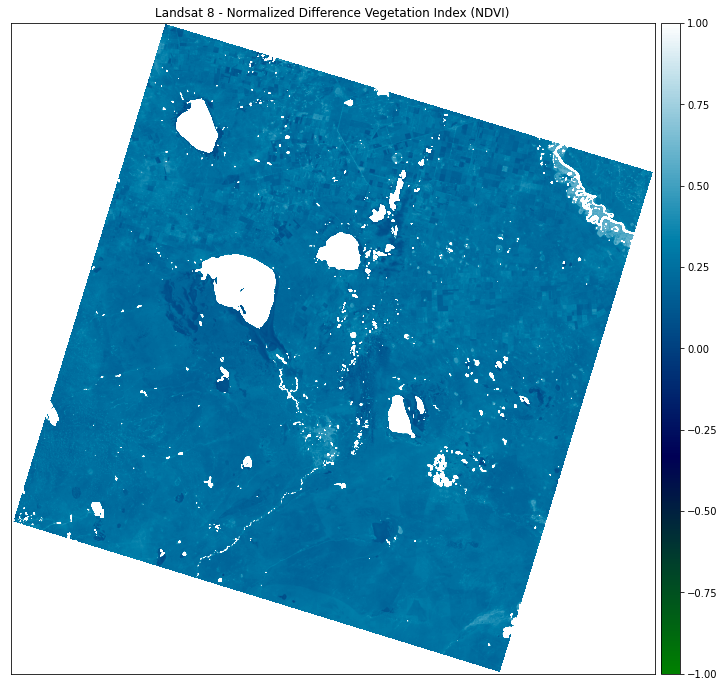

<AxesSubplot:title={'center':'Landsat 8 - Normalized Difference Vegetation Index (NDVI)'}>

In [72]:
titles = ["Landsat 8 - Normalized Difference Vegetation Index (NDVI)"]

# Turn off bytescale scaling due to float values for NDVI
ep.plot_bands(ndvi, cmap="ocean", cols=1, title=titles, vmin=-1, vmax=1)

In [75]:
# Create classes and apply to NDVI results
ndvi_class_bins = [-np.inf, 0.4, np.inf]
ndvi_landsat_class = np.digitize(ndvi, ndvi_class_bins)

# Apply the nodata mask to the newly classified NDVI data
ndvi_landsat_class = np.ma.masked_where(
    np.ma.getmask(ndvi), ndvi_landsat_class
)
np.unique(ndvi_landsat_class)

masked_array(data=[1, 2, --],
             mask=[False, False,  True],
       fill_value=999999,
            dtype=int64)

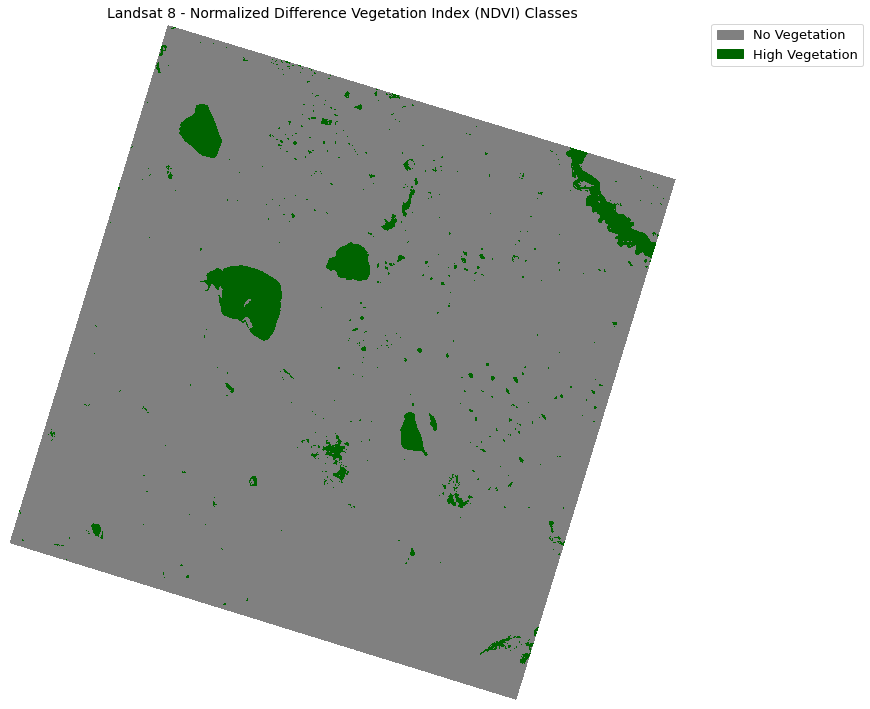

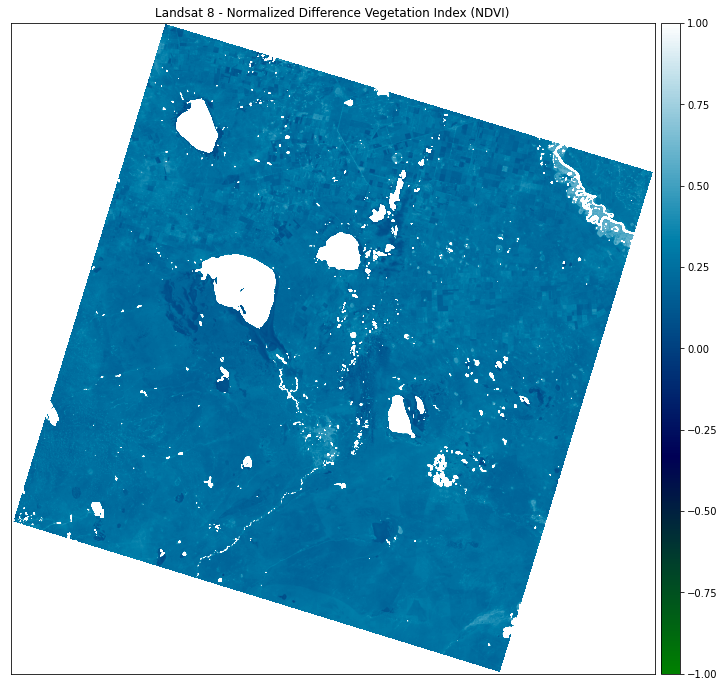

<AxesSubplot:title={'center':'Landsat 8 - Normalized Difference Vegetation Index (NDVI)'}>

In [77]:
# Define color map
nbr_colors = ["gray","darkgreen"]
nbr_cmap = ListedColormap(nbr_colors)

# Define class names
ndvi_cat_names = [
    "No Vegetation",
    "High Vegetation",
]

# Get list of classes
classes = np.unique(ndvi_landsat_class)
classes = classes.tolist()
# The mask returns a value of none in the classes. remove that
classes = classes[0:2]

# Plot your data
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(ndvi_landsat_class, cmap=nbr_cmap)

ep.draw_legend(im_ax=im, classes=classes, titles=ndvi_cat_names)
ax.set_title(
    "Landsat 8 - Normalized Difference Vegetation Index (NDVI) Classes",
    fontsize=14,
)
ax.set_axis_off()

# Auto adjust subplot to fit figure size
nwdi_result = plt.tight_layout()
ep.plot_bands(ndvi, cmap="ocean", cols=1, title=titles, vmin=-1, vmax=1)


In [89]:
ndwiImage = rasterio.open(res + '/ndwi_' + i,'w',driver='Gtiff',
                            width=band3.width, 
                            height = band3.height, 
                            count=1, crs=band3.crs, 
                            transform=band3.transform, 
                            dtype='float64')
        ndwiImage.write(ndwi,1)
        ndwiImage.close()

TypeError: Integer width and height are required.